<a href="https://colab.research.google.com/github/jcbertucci/MVP-Sprint-Machine-Learning-Analytics-40530010056_20240_02-/blob/main/Machine_Learning_%26_Analytics_(40530010056_20240_02).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Planilhas disponíveis: ['amazon_uk_shoes_products_datase']
Visualização inicial do dataset:
                                      url  \
0  https://www.amazon.co.uk/dp/B07SBX32T5   
1  https://www.amazon.co.uk/dp/B07SBX32T5   
2  https://www.amazon.co.uk/dp/B07SBX32T5   
3  https://www.amazon.co.uk/dp/B07SBX32T5   
4  https://www.amazon.co.uk/dp/B08SW434MG   

                                     Nome do produto Nome do avaliador  \
0  Klasified Women's Transparent Clear Sneaker Sh...  Jocelyn McSayles   
1  Klasified Women's Transparent Clear Sneaker Sh...      Kenia Rivera   
2  Klasified Women's Transparent Clear Sneaker Sh...       Chris Souza   
3  Klasified Women's Transparent Clear Sneaker Sh...   Amazon Customer   
4  GUESS Women's Bradly Gymnastics Shoe, White, 7 UK         Graziella   

  título da avaliação                                 texto da avaliação  \
0             Love em  Love these. Was looking for converses and thes...   
1  The plastic ripped  The shoes are ver

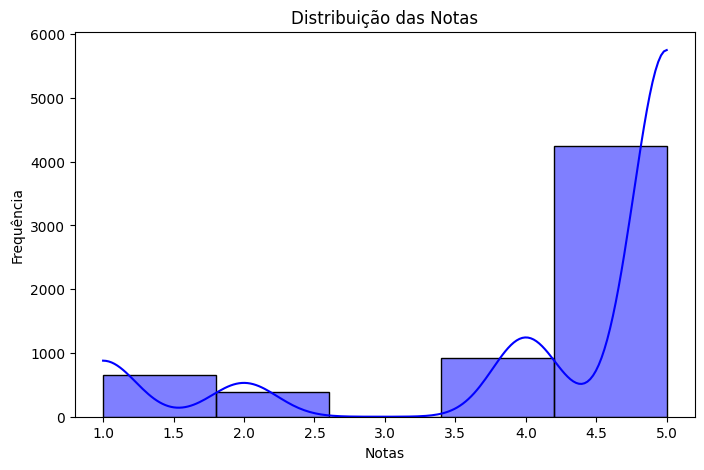

<ipython-input-7-47eac59ea44c>:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='compra verificada', data=df, palette='pastel')


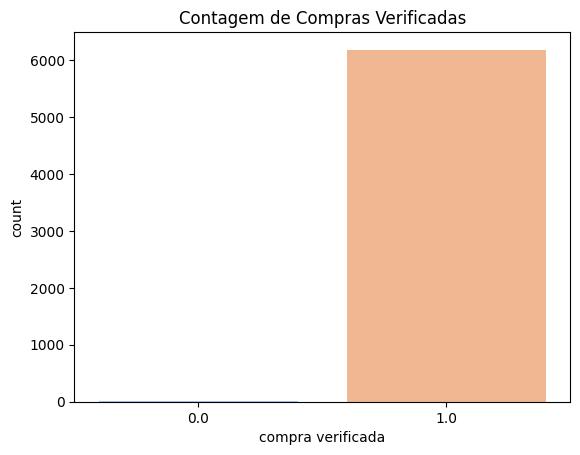

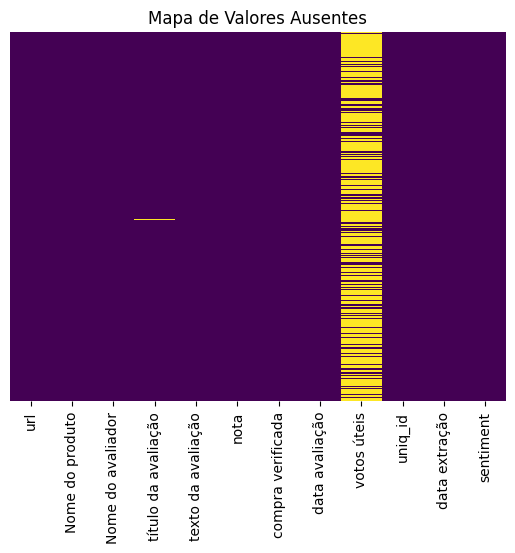


Acurácia do Modelo: 0.87409200968523


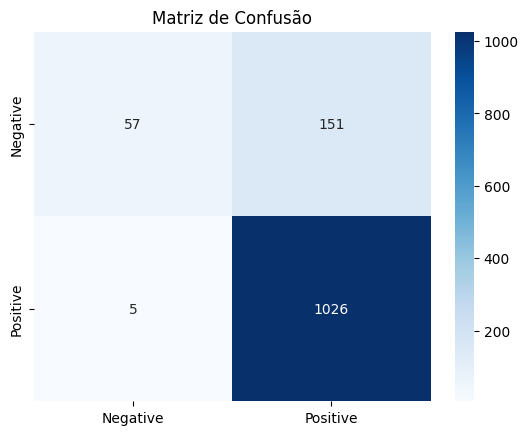


Melhores hiperparâmetros: {'C': 10, 'solver': 'lbfgs'}

Acurácia após otimização: 0.9055690072639225


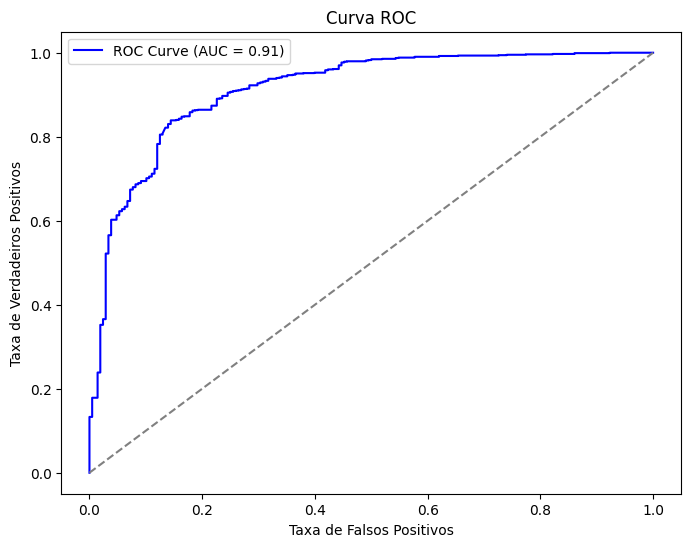


Acurácia usando Pipeline: 0.9055690072639225

Modelo salvo como 'sentiment_analysis_pipeline.pkl'


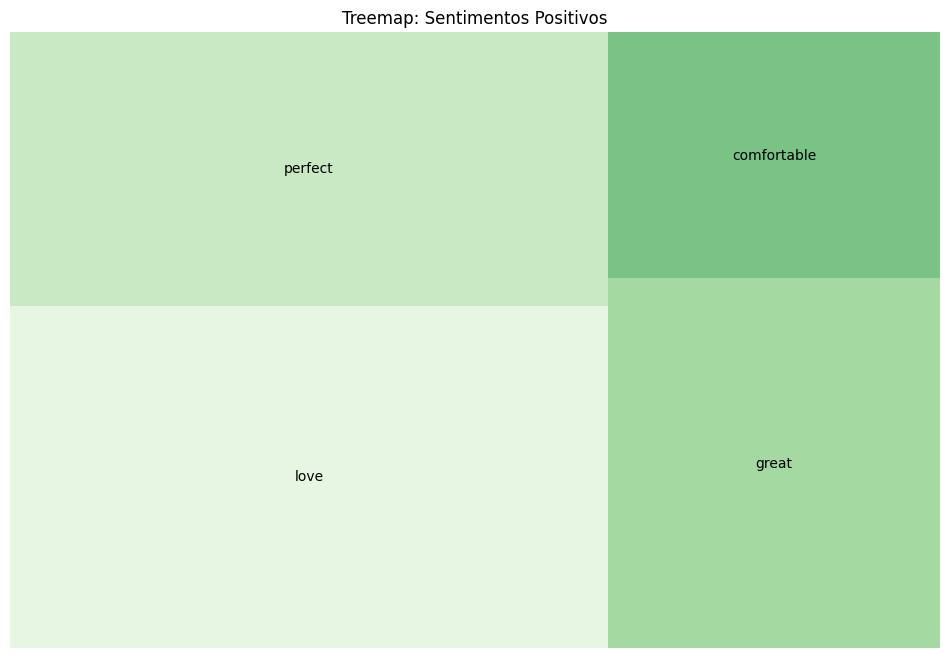

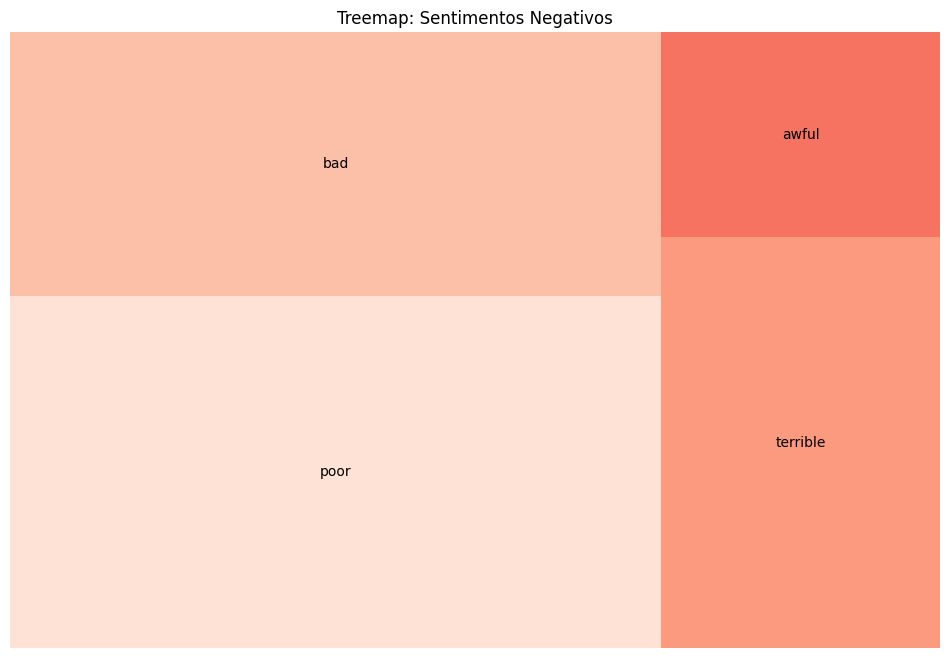

In [7]:
# 1. Importação de Bibliotecas
# ========================================
# Importa as bibliotecas necessárias para manipulação de dados, visualização, modelagem e salvamento.
!pip install squarify
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.pipeline import Pipeline
import joblib

# ========================================
# 2. Carregamento do Dataset
# ========================================
# URL do arquivo no GitHub
url = 'https://raw.githubusercontent.com/jcbertucci/MVP_-Machine-Learning-Analytics/main/Amazon%20shoes%20.xlsx'

# Carregando o arquivo Excel
data = pd.ExcelFile(url)

# Exibindo as planilhas disponíveis
print("Planilhas disponíveis:", data.sheet_names)

# Lendo a planilha específica
df = data.parse('amazon_uk_shoes_products_datase')

# Visualizando as primeiras linhas
print("Visualização inicial do dataset:")
print(df.head())

# ========================================
# 3. Análise e Limpeza de Dados
# ========================================
# Verificando valores ausentes em cada coluna
print("\nValores ausentes por coluna:\n", df.isnull().sum())

# Criando rótulos de sentimentos
df = df[df['nota'].notnull() & df['texto da avaliação'].notnull()]
df['sentiment'] = df['nota'].apply(lambda x: 'positive' if x >= 4 else ('negative' if x <= 2 else None))
df = df[df['sentiment'].notnull()]  # Remove neutros

# Exibindo dados após a limpeza
print("\nDados após limpeza e criação de rótulos:")
print(df[['nota', 'sentiment', 'texto da avaliação']].head())

# Estrutura do DataFrame após limpeza
print("\nEstrutura do Dataset Após Limpeza:")
df.info()
print("\nResumo Estatístico das Colunas Numéricas:")
print(df.describe())

# ========================================
# 4. Visualizações Exploratórias
# ========================================
# Distribuição das notas
plt.figure(figsize=(8, 5))
sns.histplot(df['nota'], bins=5, kde=True, color='blue')
plt.title('Distribuição das Notas')
plt.xlabel('Notas')
plt.ylabel('Frequência')
plt.show()

# Contagem de compras verificadas
if 'compra verificada' in df.columns:
    sns.countplot(x='compra verificada', data=df, palette='pastel')
    plt.title('Contagem de Compras Verificadas')
    plt.show()

# Heatmap de valores ausentes
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Mapa de Valores Ausentes')
plt.show()

# ========================================
# 5. Divisão do Dataset
# ========================================
X = df['texto da avaliação']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# ========================================
# 6. Vetorização dos Textos
# ========================================
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# ========================================
# 7. Treinamento e Avaliação do Modelo
# ========================================
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_vec, y_train)
y_pred = model.predict(X_test_vec)

print("\nAcurácia do Modelo:", accuracy_score(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Matriz de Confusão')
plt.show()

# ========================================
# 8. Otimização de Hiperparâmetros
# ========================================
param_grid = {'C': [0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']}
grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_vec, y_train)

best_model = grid_search.best_estimator_
y_pred_optimized = best_model.predict(X_test_vec)

print("\nMelhores hiperparâmetros:", grid_search.best_params_)
print("\nAcurácia após otimização:", accuracy_score(y_test, y_pred_optimized))

# ========================================
# 9. Avaliação Avançada (Curva ROC)
# ========================================
y_test_prob = best_model.predict_proba(X_test_vec)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob, pos_label='positive')
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('Curva ROC')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.legend()
plt.show()

# ========================================
# 10. Implementação com Pipeline
# ========================================
pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(stop_words='english', max_features=5000)),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42, C=grid_search.best_params_['C'], solver=grid_search.best_params_['solver']))
])

pipeline.fit(X_train, y_train)
y_pipeline_pred = pipeline.predict(X_test)
print("\nAcurácia usando Pipeline:", accuracy_score(y_test, y_pipeline_pred))

# ========================================
# 11. Salvando o Modelo Treinado
# ========================================
joblib.dump(pipeline, 'sentiment_analysis_pipeline.pkl')
print("\nModelo salvo como 'sentiment_analysis_pipeline.pkl'")

# ========================================
# 12. Treemap de Sentimentos
# ========================================
data = {
    "word": ["love", "perfect", "great", "comfortable", "poor", "bad", "terrible", "awful"],
    "frequency": [150, 120, 90, 60, 40, 30, 20, 10],
    "sentiment": ["positive", "positive", "positive", "positive", "negative", "negative", "negative", "negative"]
}
df_example = pd.DataFrame(data)

for sentiment, color, title in [("positive", "Greens", "Treemap: Sentimentos Positivos"),
                                ("negative", "Reds", "Treemap: Sentimentos Negativos")]:
    sentiment_data = df_example[df_example['sentiment'] == sentiment]
    plt.figure(figsize=(12, 8))
    squarify.plot(sizes=sentiment_data['frequency'], label=sentiment_data['word'], color=sns.color_palette(color), alpha=.8)
    plt.title(title)
    plt.axis('off')
    plt.show()